In [1]:
import torch, torchvision
import matplotlib.pyplot as plt
from copy import deepcopy
import detectron2
import cv2
import pandas as pd
import numpy as np

/home/prsood/projects/def-whkchun/prsood/sarcasm_venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
ll = torch.rand((4))
print(ll)
ll.reshape(2,2,1).shape

tensor([0.7520, 0.4285, 0.8900, 0.8013])


torch.Size([2, 2, 1])

In [2]:
x = torch.rand((7731,1024))
x.shape

torch.Size([7731, 1024])

In [6]:
r = 7731%8

In [7]:
x[:-r,:].shape

torch.Size([7728, 1024])

In [5]:
7728%8


0

In [3]:
from torch.nn.functional import pad

In [15]:
l = torch.rand(1203, 400 , 3)


In [13]:
(pad(l,(0,0,0,400), 'constant' , 0) ).shape

torch.Size([1203, 800, 3])

In [29]:

# convert_to_tensor = lambda x: torch.Tensor(x.astype("float32").transpose(2, 0, 1)) if x.shape[0] < x.shape[1] else torch.Tensor(x.astype("float32").transpose(2, 1, 0))
def convert_to_tensor(x):
    if x.shape[0] < x.shape[1]:
        ans = torch.Tensor(x.astype("float32").transpose(2, 0, 1))
    else:
        ans = torch.Tensor(x.astype("float32").transpose(2, 1, 0))
    if ans.shape[1] < 800:
        return pad(ans,(0,0,0,400), 'constant' , 0)
    return ans


In [27]:
z = torch.rand(800, 1226 , 3)
y = torch.rand(1203, 800 , 3)

# convert_to_tensor = lambda l: torch.Tensor(l.transpose(2, 0, 1)) if l.shape[0] == 800 else torch.Tensor(l.transpose(2, 1, 0))

In [25]:
y.transpose(2, 0).shape

torch.Size([3, 800, 1203])

In [30]:
convert_to_tensor(z).shape

torch.Size([800, 1226, 3])

In [3]:
f = torch.rand(3, 900 , 1203)

In [4]:
f[:,:800,:].shape

torch.Size([3, 800, 1203])

In [2]:
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.structures.image_list import ImageList
from detectron2.data import transforms as T
from detectron2.modeling.box_regression import Box2BoxTransform
from detectron2.structures.boxes import Boxes
from detectron2.layers import nms
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputs


In [3]:
df = pd.read_pickle("../data/HatefulMemes_noTest.pkl")

In [4]:
idx = 320

In [8]:
img1 = plt.imread(df.iloc[idx]["img_path"][3:])

MemoryError: 

In [7]:
img1_bgr1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.imshow(img1_bgr1)
plt.show()

error: OpenCV(4.5.1) /home/aroudgar/src/python-wheels/opencv-python/opencv-python-4.5.1.48/opencv/modules/core/src/alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 2409000 bytes in function 'OutOfMemoryError'


In [14]:
df.iloc[idx]["text"]

"holocaust jokes are offensive ann frankly aren't funny"

In [15]:
df.iloc[idx]["label"]

1

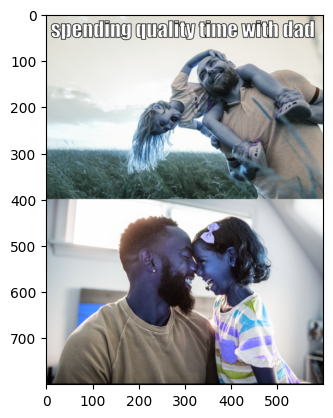

In [18]:
idx = 90
img2 = plt.imread(df.iloc[idx]["img_path"][3:])
img2_bgr1 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
plt.imshow(img2_bgr1)
plt.show()

In [19]:
print(img1.shape)
print(img2.shape)

(365, 550, 3)
(800, 600, 3)


In [20]:
cfg_path = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"

def load_config_and_model_weights(cfg_path):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(cfg_path))

    # ROI HEADS SCORE THRESHOLD
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

    # Comment the next line if you're using 'cuda'
    cfg['MODEL']['DEVICE']='cpu'

    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(cfg_path)

    return cfg

cfg = load_config_and_model_weights(cfg_path)

In [21]:
def get_model(cfg):
    # build model
    model = build_model(cfg)

    # load weights
    checkpointer = DetectionCheckpointer(model)
    checkpointer.load(cfg.MODEL.WEIGHTS)

    # eval mode
    model.eval()
    return model

# model = get_model(cfg)

: 

: 